# Normality Testing

In statistics , **normality tests** are used to determine if a data set is well-modeled by a normal distribution and to compute how likely it is for a random variable underlying the data set to be normally distributed.

More precisely, the tests are a form of model selection , and can be interpreted several ways, depending on one\'s interpretations of probability:

-  In descriptive statistics terms, one measures a goodness of fit of a normal model to the data -- if the fit is poor then the data are not well modeled in that respect by a normal distribution, without making a judgment on any underlying variable.
-  In frequentist statistics   statistical hypothesis testing , data are tested against the null hypothesis that it is normally distributed.
-  In Bayesian statistics , one does not \"test normality\" per se, but rather computes the likelihood that the data come from a normal distribution with given parameters *μ*,*σ* (for all *μ*,*σ*), and
  compares that with the likelihood that the data come from other distributions under consideration, most simply using a Bayes factor (giving the relative likelihood of seeing the data given different models), or more finely taking a prior distribution on possible models and parameters and computing a posterior
  distribution given the computed likelihoods.

A normality test is used to determine whether sample data has been drawn from a normally distributed population (within some tolerance). A number of statistical tests, such as the Student\'s t-test and the one-way and two-way ANOVA require a normally distributed sample population. 

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas.testing as tm
from scipy import stats
import seaborn as sns # for nice looking plots
# display plots in the notebook
%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [50]:
n=50
def random_distributions(n=50):
  mu, sigma, p = 5, 2*np.sqrt(2), 0.3# mean, standard deviation, probabilty of success
  shape, scale = 2.5, 2. # mean=5, std=2*sqrt(2)
  normal_dist = np.random.normal(mu, sigma, n)
  lognormal_dist = np.random.lognormal(mu, sigma, n)
  lognormal_dist = np.random.lognormal(np.log2(mu), np.log2(sigma), n) 
  pareto_dist = np.random.pareto(mu, n)
  uniform_dist= np.random.uniform(np.amin(normal_dist),np.amax(normal_dist),n)
  binomial_dist= np.random.binomial(n, p,n)
  gamma_dist= np.random.gamma(shape, scale, n) 
  poisson_dist= np.random.poisson((n*0.05), n)  
  df = pd.DataFrame({'Normal' : normal_dist, 'Lognormal' : lognormal_dist, 'Pareto' : pareto_dist,'Gamma' : gamma_dist, 'Poisson' : poisson_dist, 'Binomial' : binomial_dist, 'Uniform' : uniform_dist})
  return df

In [51]:
df=random_distributions(n=50)
df.head()

,Normal,Lognormal,Pareto,Gamma,Poisson,Binomial,Uniform
0,2.962118,13.754882,0.117233,3.270986,2,14,8.001668
1,6.746138,13.861978,0.016306,13.781477,0,14,7.374926
2,5.365028,2.151212,0.021190,3.822280,1,17,1.166132
3,3.535212,1.052084,0.697662,7.366423,0,11,6.473809
4,8.740856,2.449063,0.670442,3.176236,4,13,10.149078


In [52]:
print(df.columns.values)

['Normal' 'Lognormal' 'Pareto' 'Gamma' 'Poisson' 'Binomial' 'Uniform']


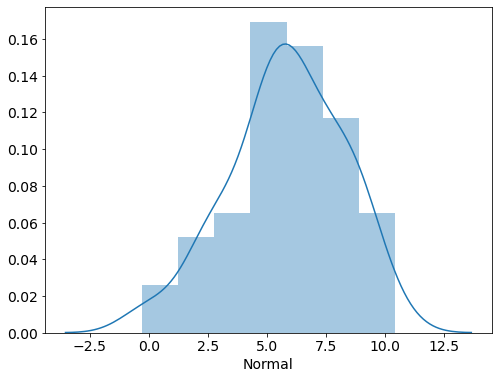

In [53]:
sns.distplot(df['Normal'])    
    

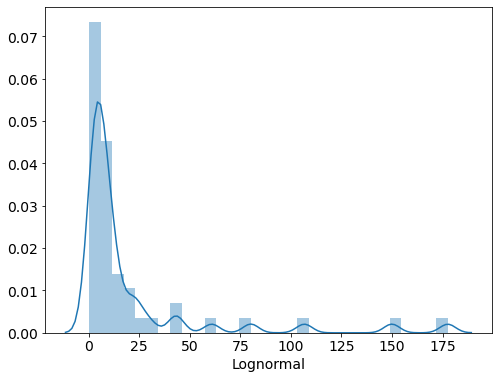

In [54]:
sns.distplot(df['Lognormal'])  

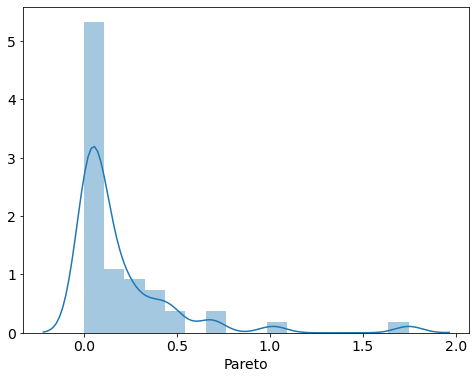

In [55]:
sns.distplot(df['Pareto'])  

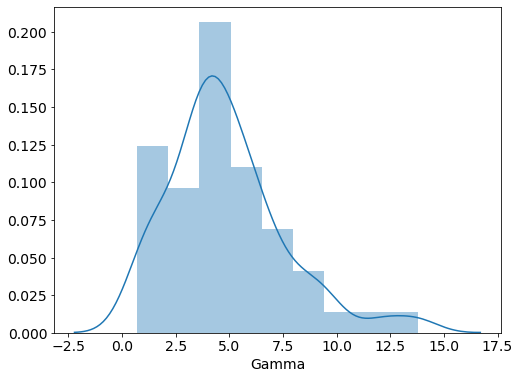

In [56]:
sns.distplot(df['Gamma'])  

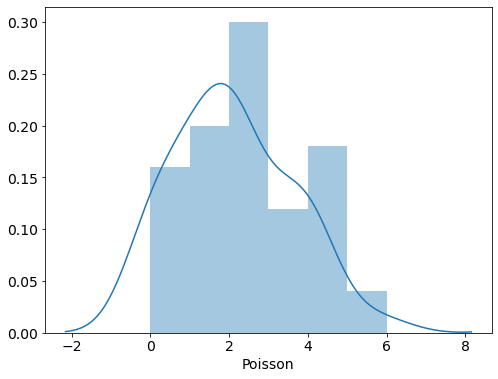

In [57]:
sns.distplot(df['Poisson'])  

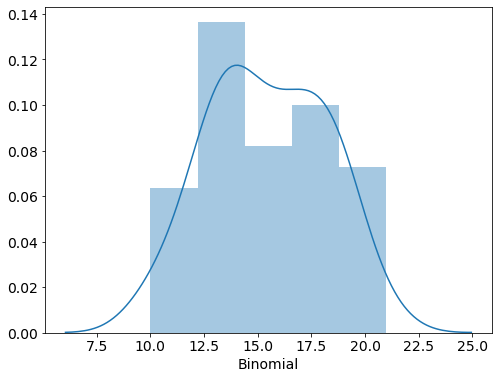

In [58]:
sns.distplot(df['Binomial'])  

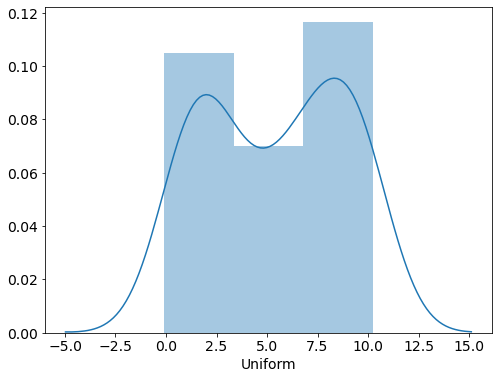

In [59]:
sns.distplot(df['Uniform'])  

In [60]:
def qqplot_stats(obs, c):
    z = (obs-np.mean(obs))/np.std(obs)
    stats.probplot(z, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot for " + c)
    plt.show()
        

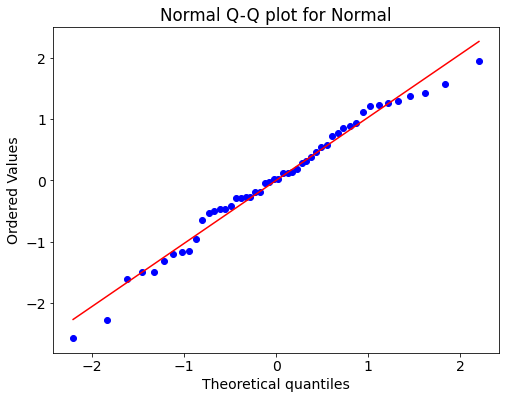

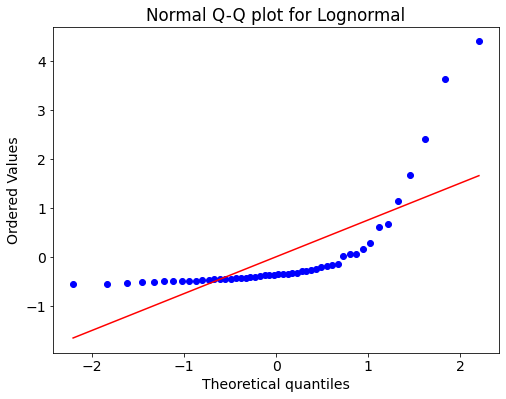

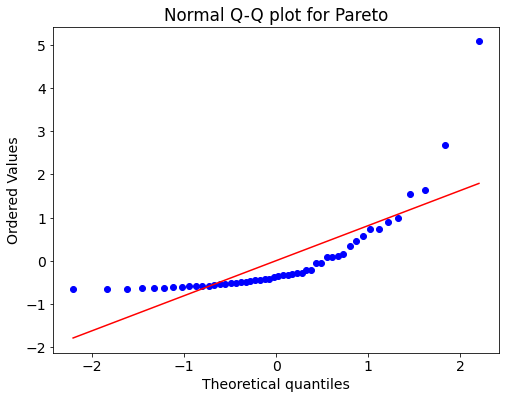

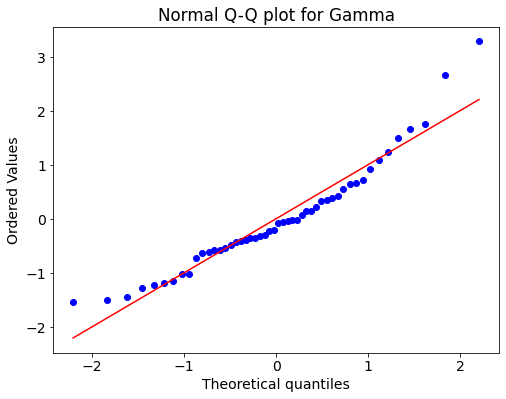

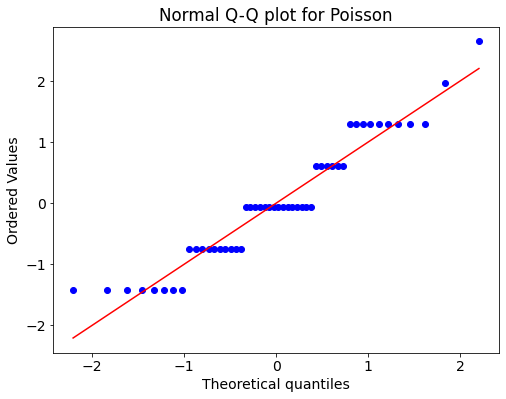

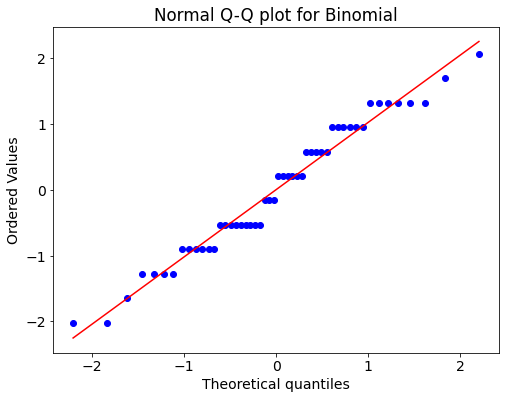

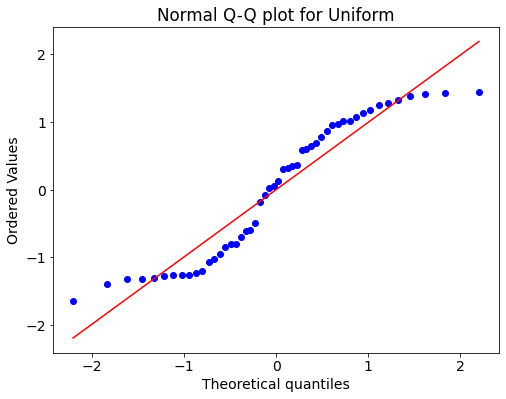

In [61]:
def qqplot_df(df):
    for col in list(df.columns.values):
      qqplot_stats(df[col], col)
qqplot_df(df) 

### Statistical tests for normality (e.g. Shapiro-Wilk test,  Anderson-Darling test, scipy.stats.normaltest, etc.)

In [62]:
def normality_stats(df):
    s={}
    for col in list(df.columns.values):
      s[col]={}
    for col in list(df.columns.values):
      s[col].update({'shapiro':stats.shapiro(df[col])})
      s[col].update({'anderson':stats.anderson(df[col], dist='norm')})
      s[col].update({'normaltest':stats.normaltest(df[col])})      
    return s


### Shapiro-Wilk test
scipy.stats.shapiro [https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)

scipy.stats.shapiro
scipy.stats.shapiro(x, a=None, reta=False)[source]
Perform the Shapiro-Wilk test for normality.

The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.

Parameters:	
x : array_like
Array of sample data.
a : array_like, optional
Array of internal parameters used in the calculation. If these are not given, they will be computed internally. If x has length n, then a must have length n/2.
reta : bool, optional
Whether or not to return the internally computed a values. The default is False.
Returns:	
W : float
The test statistic.
p-value : float
The p-value for the hypothesis test.
a : array_like, optional
If reta is True, then these are the internally computed “a” values that may be passed into this function on future calls.

### Anderson-Darling test

scipy.stats.anderson [https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html)

scipy.stats.anderson(x, dist='norm')
Anderson-Darling test for data coming from a particular distribution

The Anderson-Darling test is a modification of the Kolmogorov- Smirnov test kstest for the null hypothesis that a sample is drawn from a population that follows a particular distribution. For the Anderson-Darling test, the critical values depend on which distribution is being tested against. This function works for normal, exponential, logistic, or Gumbel (Extreme Value Type I) distributions.

Parameters:	
x : array_like
array of sample data
dist : {‘norm’,’expon’,’logistic’,’gumbel’,’gumbel_l’, gumbel_r’,
‘extreme1’}, optional the type of distribution to test against. The default is ‘norm’ and ‘extreme1’, ‘gumbel_l’ and ‘gumbel’ are synonyms.
Returns:	
statistic : float
The Anderson-Darling test statistic
critical_values : list
The critical values for this distribution
significance_level : list
The significance levels for the corresponding critical values in percents. The function returns critical values for a differing set of significance levels depending on the distribution that is being tested against.

Note: The critical values are for a given significance level. When we want a smaller significance level, then we have to increase the critical values, assuming we are in the right, upper tail of the distribution.
 
### scipy.stats.normaltest

scipy.stats.normaltest [https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.normaltest.html](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.normaltest.html)
scipy.stats.normaltest(a, axis=0)
Tests whether a sample differs from a normal distribution.

This function tests the null hypothesis that a sample comes from a normal distribution. It is based on D’Agostino and Pearson’s [R251], [R252] test that combines skew and kurtosis to produce an omnibus test of normality.

Parameters:	
a : array_like
The array containing the data to be tested.
axis : int or None
If None, the array is treated as a single data set, regardless of its shape. Otherwise, each 1-d array along axis axis is tested.
Returns:	
k2 : float or array
s^2 + k^2, where s is the z-score returned by skewtest and k is the z-score returned by kurtosistest.
p-value : float or array
A 2-sided chi squared probability for the hypothesis test.

In [63]:
norm_stats=normality_stats(df)
print (norm_stats)

{'Normal': {'shapiro': (0.9797486066818237, 0.5414091348648071), 'anderson': AndersonResult(statistic=0.28835856486603717, critical_values=array([0.538, 0.613, 0.736, 0.858, 1.021]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ])), 'normaltest': NormaltestResult(statistic=1.413528995591388, pvalue=0.4932374895056011)}, 'Lognormal': {'shapiro': (0.540875256061554, 2.835395633560278e-11), 'anderson': AndersonResult(statistic=8.577640310805009, critical_values=array([0.538, 0.613, 0.736, 0.858, 1.021]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ])), 'normaltest': NormaltestResult(statistic=54.47548229259209, pvalue=1.481833199555732e-12)}, 'Pareto': {'shapiro': (0.6297937631607056, 5.537469927041627e-10), 'anderson': AndersonResult(statistic=5.4682758073660835, critical_values=array([0.538, 0.613, 0.736, 0.858, 1.021]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ])), 'normaltest': NormaltestResult(statistic=59.03814142352907, pvalue=1.5136674745264556e-13)

In [64]:
df=random_distributions(n=500)
df.head()

,Normal,Lognormal,Pareto,Gamma,Poisson,Binomial,Uniform
0,3.988194,24.654387,0.032112,2.825609,33,130,11.882334
1,1.754295,27.282898,1.653774,2.910039,23,159,2.255460
2,6.594701,6.164241,0.467701,8.701056,20,147,2.431474
3,4.097942,2.084641,0.103051,0.895209,26,134,7.706383
4,7.458304,1.416358,0.277498,1.546953,20,139,4.537779


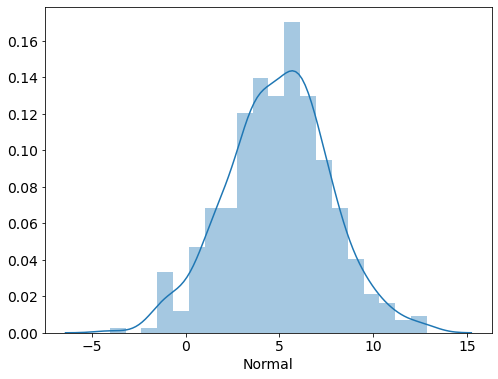

In [65]:
sns.distplot(df['Normal'])  


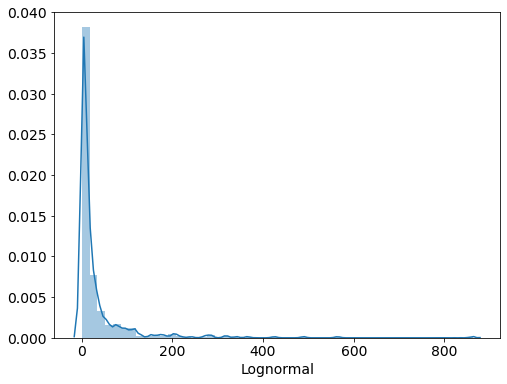

In [66]:
sns.distplot(df['Lognormal'])  

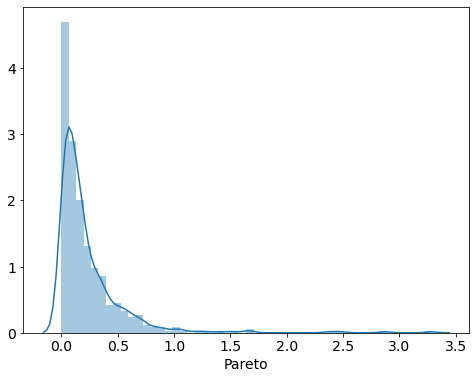

In [67]:
sns.distplot(df['Pareto'])  

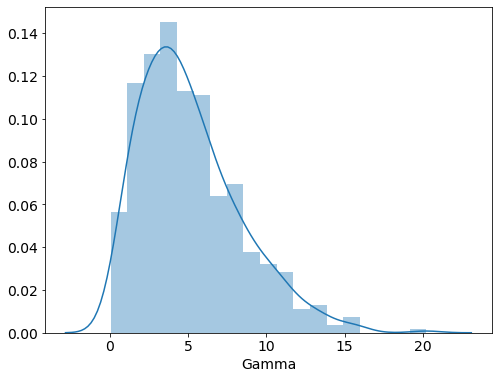

In [68]:
sns.distplot(df['Gamma'])  

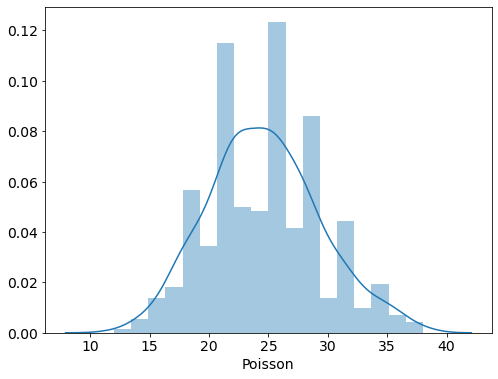

In [69]:
sns.distplot(df['Poisson'])

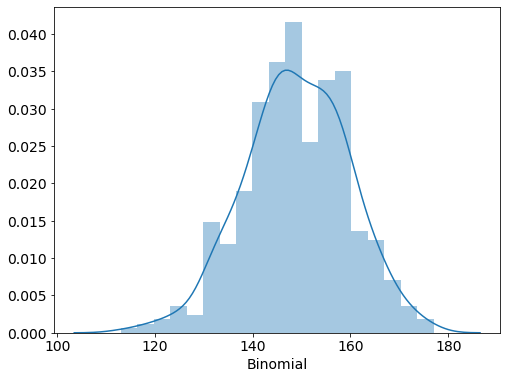

In [70]:
sns.distplot(df['Binomial'])  

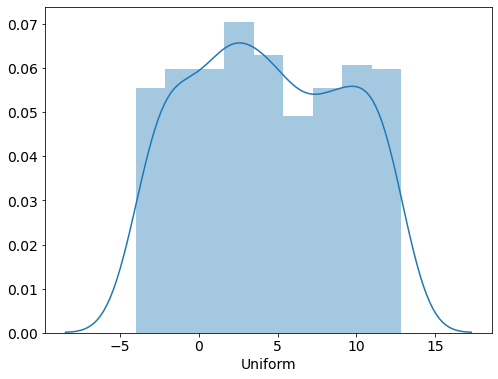

In [71]:
sns.distplot(df['Uniform'])  

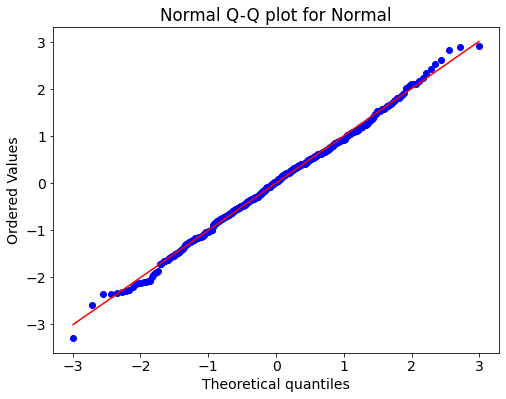

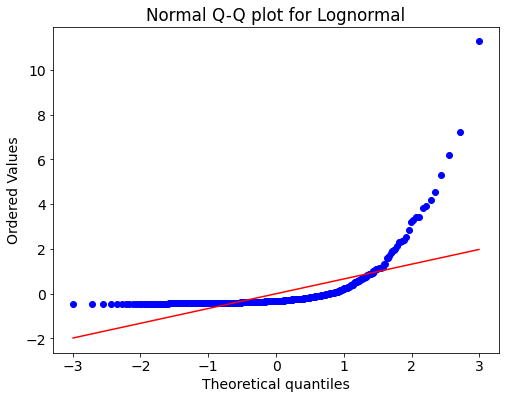

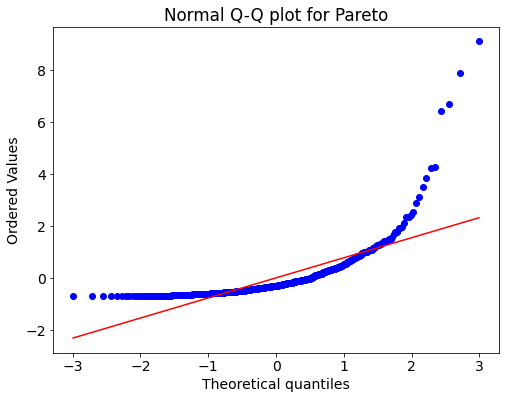

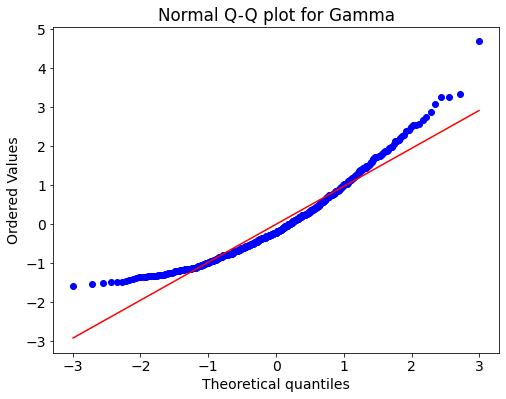

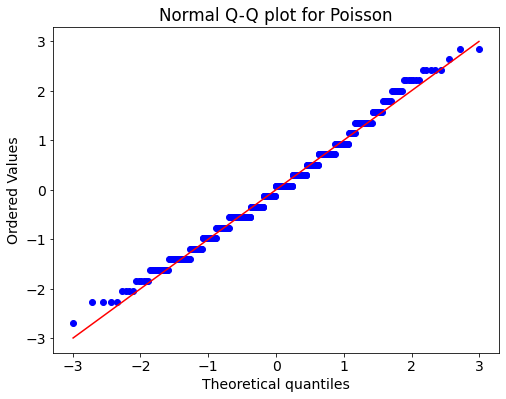

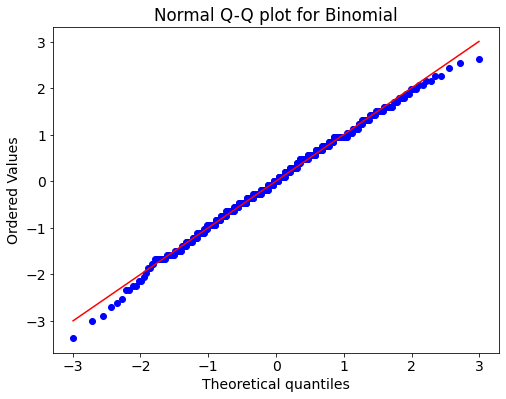

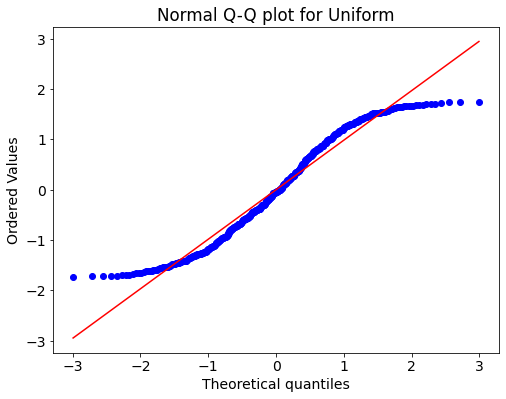

In [72]:
qqplot_df(df)

In [73]:
norm_stats=normality_stats(df)
print (norm_stats)

{'Normal': {'shapiro': (0.9974563717842102, 0.6460763216018677), 'anderson': AndersonResult(statistic=0.34537785218623185, critical_values=array([0.571, 0.651, 0.781, 0.911, 1.083]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ])), 'normaltest': NormaltestResult(statistic=0.5826912943324715, pvalue=0.7472573459907058)}, 'Lognormal': {'shapiro': (0.43769145011901855, 1.025135249807989e-36), 'anderson': AndersonResult(statistic=87.8767158462706, critical_values=array([0.571, 0.651, 0.781, 0.911, 1.083]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ])), 'normaltest': NormaltestResult(statistic=585.6991319261983, pvalue=6.562200180798999e-128)}, 'Pareto': {'shapiro': (0.5938315391540527, 1.531284458595134e-32), 'anderson': AndersonResult(statistic=47.16591482592844, critical_values=array([0.571, 0.651, 0.781, 0.911, 1.083]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ])), 'normaltest': NormaltestResult(statistic=497.39414655457244, pvalue=9.822757221386578e-1

In [74]:
df=random_distributions(n=5000)
df.head()

,Normal,Lognormal,Pareto,Gamma,Poisson,Binomial,Uniform
0,6.342886,20.391316,0.018058,10.573010,278,1529,-1.004393
1,5.382510,19.490374,0.442855,5.146663,257,1479,7.190947
2,3.156919,0.480588,0.386334,14.248316,236,1559,14.762143
3,7.667076,0.842647,0.438588,6.741974,234,1515,9.770307
4,-1.779016,16.859659,0.051794,9.863722,241,1516,11.078533


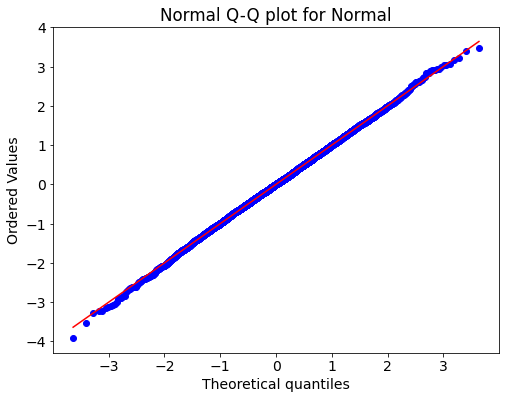

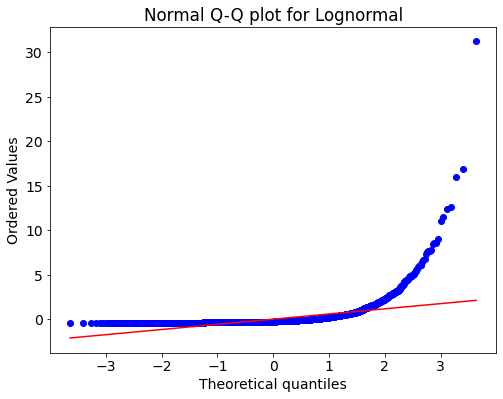

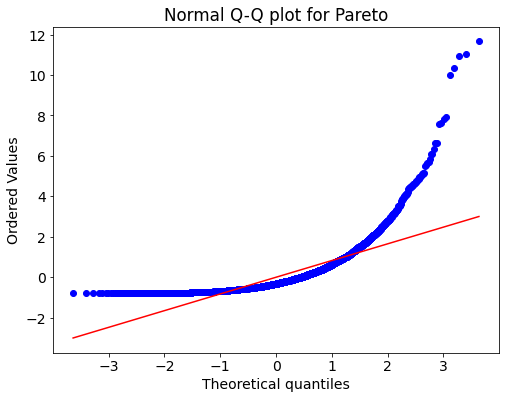

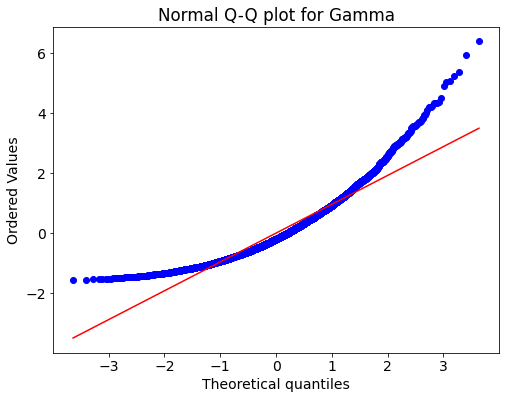

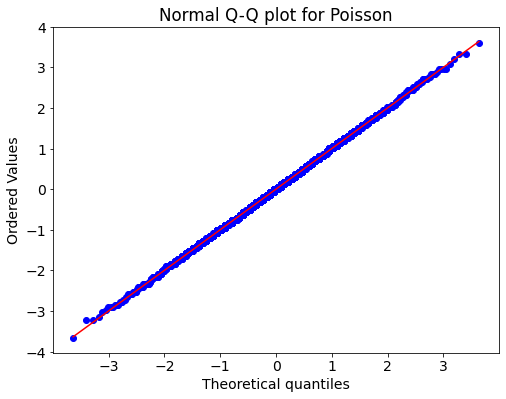

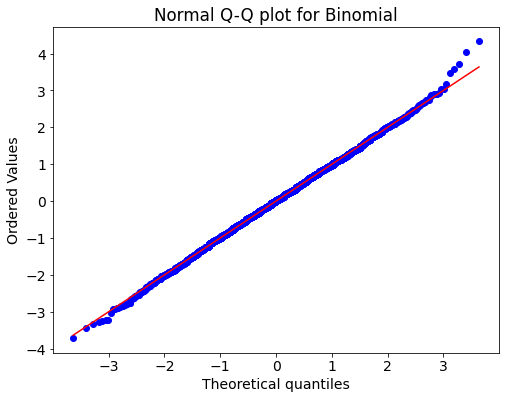

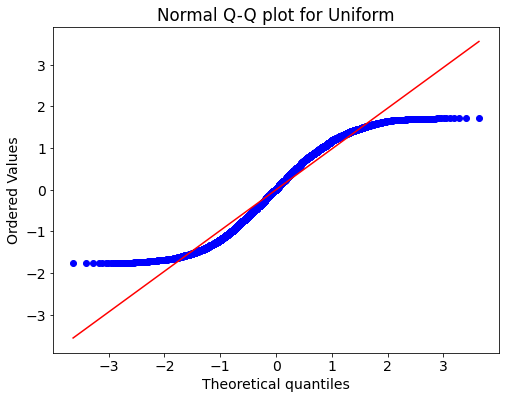

In [76]:
qqplot_df(df)

In [77]:
norm_stats=normality_stats(df)
print (norm_stats)

{'Normal': {'shapiro': (0.9996829628944397, 0.6549193263053894), 'anderson': AndersonResult(statistic=0.28665883953181037, critical_values=array([0.576, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ])), 'normaltest': NormaltestResult(statistic=2.6291822401009206, pvalue=0.2685841194521807)}, 'Lognormal': {'shapiro': (0.3392059803009033, 0.0), 'anderson': AndersonResult(statistic=914.8089432542256, critical_values=array([0.576, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ])), 'normaltest': NormaltestResult(statistic=8549.522965975599, pvalue=0.0)}, 'Pareto': {'shapiro': (0.6823320388793945, 0.0), 'anderson': AndersonResult(statistic=379.0741657327544, critical_values=array([0.576, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ])), 'normaltest': NormaltestResult(statistic=3933.609995248212, pvalue=0.0)}, 'Gamma': {'shapiro': (0.9181479215621948, 0.0), 'anderson': AndersonR

In [82]:
#Read in data from source 
df = pd.read_csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
df = df.dropna() 
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1f4b7b8518>,
      dtype=object)

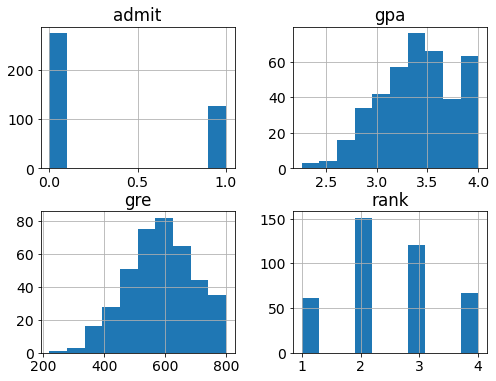

In [90]:
df.hist()

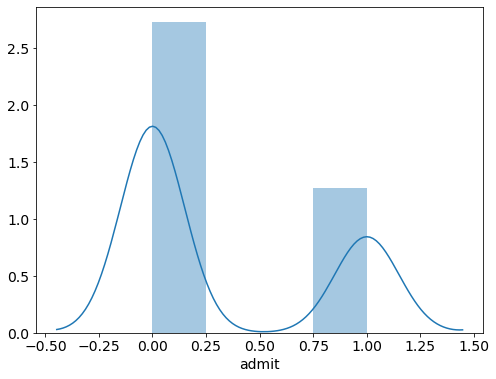

In [85]:
sns.distplot(df['admit'])

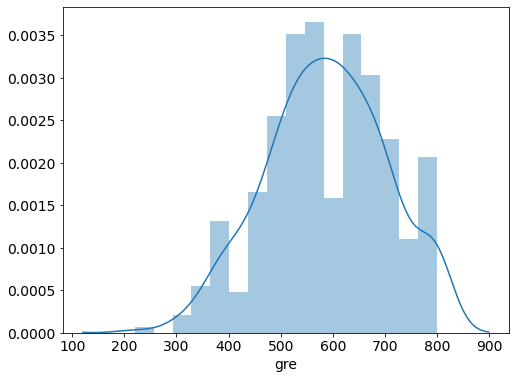

In [86]:
sns.distplot(df['gre'])

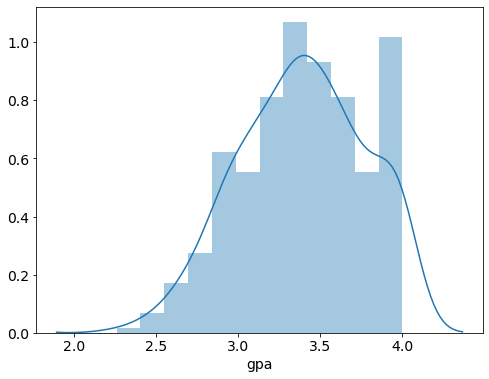

In [87]:
sns.distplot(df['gpa'])

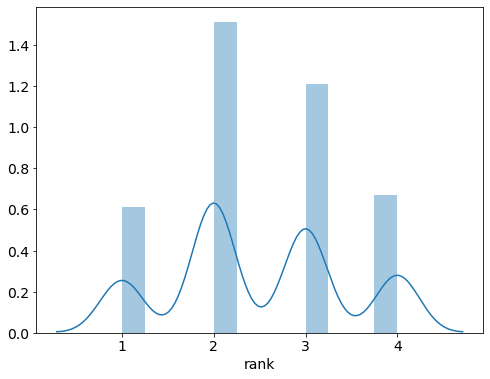

In [88]:
sns.distplot(df['rank'])

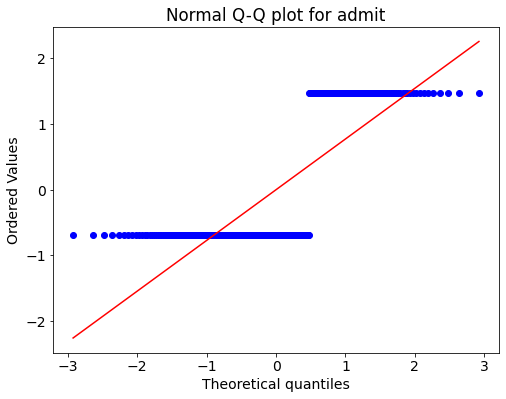

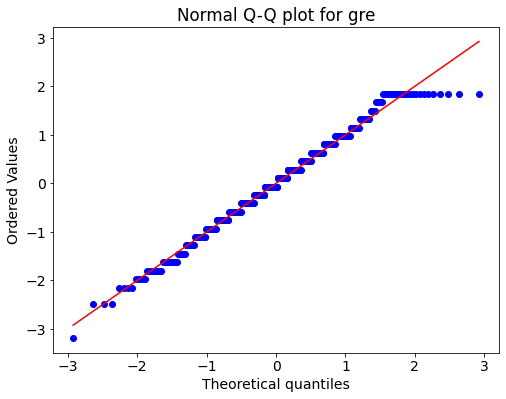

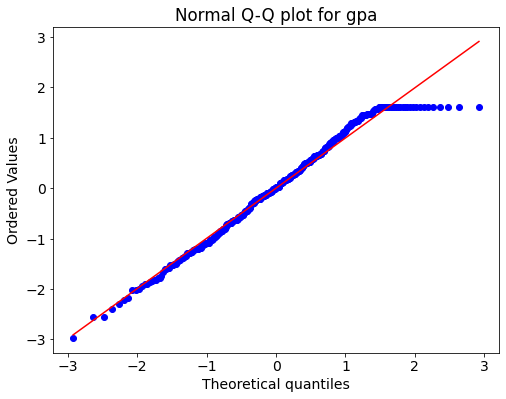

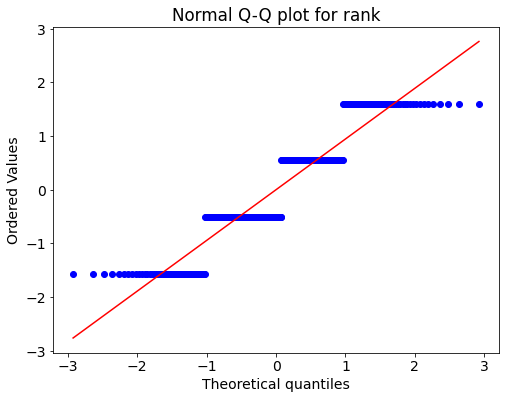

In [89]:
qqplot_df(df)

In [84]:
norm_stats=normality_stats(df)
print (norm_stats)

{'admit': {'shapiro': (0.5861505270004272, 9.423579731785052e-30), 'anderson': AndersonResult(statistic=84.55142273327908, critical_values=array([0.57 , 0.65 , 0.779, 0.909, 1.081]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ])), 'normaltest': NormaltestResult(statistic=2326.2278502085974, pvalue=0.0)}, 'gre': {'shapiro': (0.9859057664871216, 0.0006272072205320001), 'anderson': AndersonResult(statistic=0.9546980383743175, critical_values=array([0.57 , 0.65 , 0.779, 0.909, 1.081]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ])), 'normaltest': NormaltestResult(statistic=3.7843808629966675, pvalue=0.1507412585438364)}, 'gpa': {'shapiro': (0.977360725402832, 6.687230779789388e-06), 'anderson': AndersonResult(statistic=1.4571141074268326, critical_values=array([0.57 , 0.65 , 0.779, 0.909, 1.081]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ])), 'normaltest': NormaltestResult(statistic=13.80695085291126, pvalue=0.0010042890241750981)}, 'rank': {'shapiro': (0